# 1. Import Packages

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import time
import os
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.layers import SimpleRNN, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

# 2. Prepare Functions

In [2]:
%run functions/combine_data.ipynb 
%run functions/initial_global_model.ipynb
%run functions/deep_learning_analysis.ipynb
%run functions/transfer_learning.ipynb 

output_folder_name = 'Results'

# 3. Centralized Learning

In [3]:
num_days = 5
mins_before_predict_list = [30] # 30 mins = 0.5 hour
window_slide_list = [180] # 180 mins = 3 hours
monitor = "val_loss"
learning_rate = 0.001
epochs = 10
neuron_nums = [64,32]
batch_size = 32
num_rounds = 5
seed_number = 1

all_patients = ["adolescent#001.csv","adolescent#002.csv","adolescent#003.csv","adolescent#004.csv","adolescent#005.csv","adolescent#006.csv","adolescent#007.csv","adolescent#008.csv","adolescent#009.csv","adolescent#010.csv","adult#001.csv","adult#002.csv","adult#003.csv","adult#004.csv","adult#005.csv","adult#006.csv","adult#007.csv","adult#008.csv","adult#009.csv","adult#010.csv","child#001.csv", "child#002.csv","child#003.csv","child#004.csv","child#005.csv","child#006.csv","child#007.csv","child#008.csv","child#009.csv","child#010.csv"]
patients_included = all_patients
function_name = "CL"
input_function_name = "CL"
output_function_name = "CTL"

combined_data_training, combined_data_validation, combined_data_testing = combine_data(patients_included,num_days,seed_number)
initial_global_model(output_folder_name, num_days, seed_number, combined_data_training, combined_data_validation, combined_data_testing, function_name, mins_before_predict_list, window_slide_list, epochs)

# 4. Transfer Learning

Apply transfer learning by fine-tuning the global model using data from individual patients. Each patient's data is used to fine-tune the global model locally, enhancing its performance based on localized characteristics.

C:\Users\xinyi.yang\Desktop\group meeting\adolescent#001.csv
C:\Users\xinyi.yang\Desktop\group meeting\adolescent#002.csv
C:\Users\xinyi.yang\Desktop\group meeting\adolescent#003.csv
C:\Users\xinyi.yang\Desktop\group meeting\adolescent#004.csv
C:\Users\xinyi.yang\Desktop\group meeting\adolescent#005.csv
C:\Users\xinyi.yang\Desktop\group meeting\adolescent#006.csv
C:\Users\xinyi.yang\Desktop\group meeting\adolescent#007.csv
C:\Users\xinyi.yang\Desktop\group meeting\adolescent#008.csv
C:\Users\xinyi.yang\Desktop\group meeting\adolescent#009.csv
C:\Users\xinyi.yang\Desktop\group meeting\adolescent#010.csv
C:\Users\xinyi.yang\Desktop\group meeting\adult#001.csv
C:\Users\xinyi.yang\Desktop\group meeting\adult#002.csv
C:\Users\xinyi.yang\Desktop\group meeting\adult#003.csv
C:\Users\xinyi.yang\Desktop\group meeting\adult#004.csv
C:\Users\xinyi.yang\Desktop\group meeting\adult#005.csv
C:\Users\xinyi.yang\Desktop\group meeting\adult#006.csv
C:\Users\xinyi.yang\Desktop\group meeting\adult#007.cs

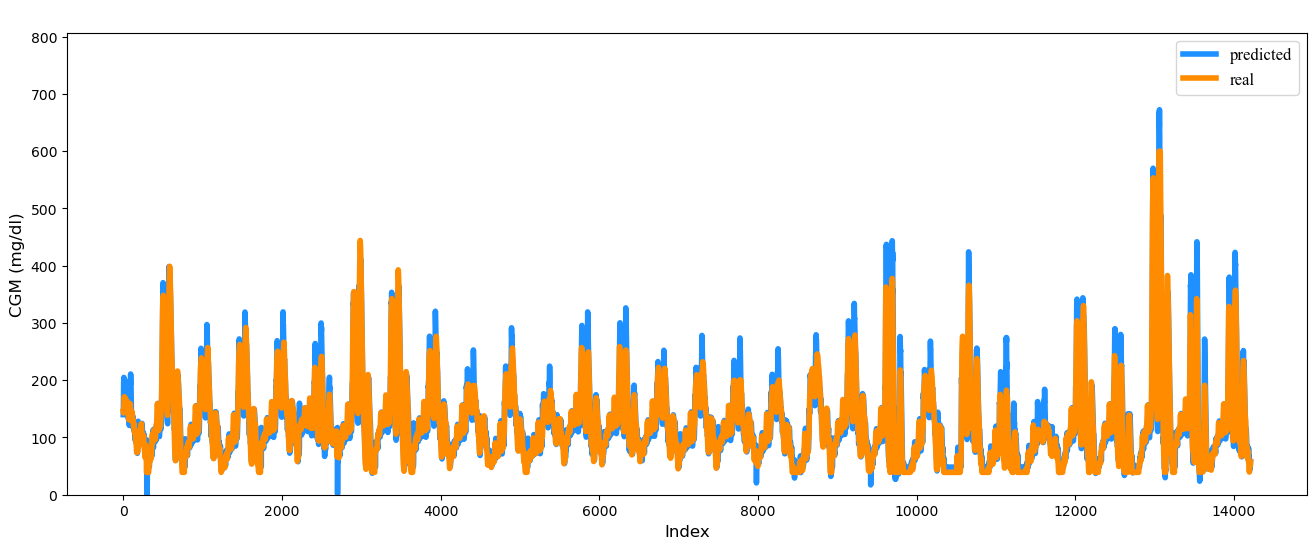

RMSE value of the model: 19.3185
C:\Users\xinyi.yang\Desktop\group meeting\adolescent#001.csv
Epoch 1/10
39/40 [============================>.] - ETA: 0s - loss: 189.7932 - mse: 189.7932
Epoch 1: val_loss improved from inf to 334.12149, saving model to Results/5_days_data_CTL/models\TL_5_adolescent#001.csv_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 48ms/step - loss: 189.5726 - mse: 189.5726 - val_loss: 334.1215 - val_mse: 334.1215
Epoch 2/10
39/40 [============================>.] - ETA: 0s - loss: 162.4470 - mse: 162.4470
Epoch 2: val_loss improved from 334.12149 to 280.71140, saving model to Results/5_days_data_CTL/models\TL_5_adolescent#001.csv_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 2s 42ms/step - loss: 162.4961 - mse: 162.4961 - val_loss: 280.7114 - val_mse: 280.7114
Epoch 3/10
39/40 [============================>.] - ETA: 0s - loss: 155.6980 - mse: 155.6980
Epoch 3: val_loss did not improve fro

40/40 [==============================] - 2s 43ms/step - loss: 162.2452 - mse: 162.2452 - val_loss: 292.6867 - val_mse: 292.6867
Epoch 6/10
39/40 [============================>.] - ETA: 0s - loss: 154.3917 - mse: 154.3917
Epoch 6: val_loss improved from 292.68671 to 280.37582, saving model to Results/5_days_data_CTL/models\TL_5_adolescent#003.csv_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 2s 40ms/step - loss: 154.1956 - mse: 154.1956 - val_loss: 280.3758 - val_mse: 280.3758
Epoch 7/10
39/40 [============================>.] - ETA: 0s - loss: 176.2989 - mse: 176.2989
Epoch 7: val_loss improved from 280.37582 to 267.12103, saving model to Results/5_days_data_CTL/models\TL_5_adolescent#003.csv_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 2s 40ms/step - loss: 176.6821 - mse: 176.6821 - val_loss: 267.1210 - val_mse: 267.1210
Epoch 8/10
39/40 [============================>.] - ETA: 0s - loss: 171.3071 - mse: 171.30

40/40 [==============================] - 2s 41ms/step - loss: 210.5673 - mse: 210.5673 - val_loss: 347.2188 - val_mse: 347.2188
Epoch 3/10
39/40 [============================>.] - ETA: 0s - loss: 188.4577 - mse: 188.4577
Epoch 3: val_loss improved from 347.21878 to 318.30603, saving model to Results/5_days_data_CTL/models\TL_5_adolescent#006.csv_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 2s 43ms/step - loss: 188.7445 - mse: 188.7445 - val_loss: 318.3060 - val_mse: 318.3060
Epoch 4/10
39/40 [============================>.] - ETA: 0s - loss: 187.0743 - mse: 187.0743
Epoch 4: val_loss did not improve from 318.30603
40/40 [==============================] - 2s 40ms/step - loss: 187.0089 - mse: 187.0089 - val_loss: 321.0631 - val_mse: 321.0631
Epoch 5/10
39/40 [============================>.] - ETA: 0s - loss: 162.2550 - mse: 162.2550
Epoch 5: val_loss improved from 318.30603 to 253.73389, saving model to Results/5_days_data_CTL/models\TL_5_adolescent

40/40 [==============================] - 2s 42ms/step - loss: 154.7625 - mse: 154.7625 - val_loss: 353.9413 - val_mse: 353.9413
Epoch 7/10
39/40 [============================>.] - ETA: 0s - loss: 169.3812 - mse: 169.3812
Epoch 7: val_loss did not improve from 353.94128
40/40 [==============================] - 2s 42ms/step - loss: 169.2956 - mse: 169.2956 - val_loss: 640.3164 - val_mse: 640.3164
Epoch 8/10
39/40 [============================>.] - ETA: 0s - loss: 165.6998 - mse: 165.6998
Epoch 8: val_loss improved from 353.94128 to 294.43958, saving model to Results/5_days_data_CTL/models\TL_5_adolescent#008.csv_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 2s 42ms/step - loss: 165.7284 - mse: 165.7284 - val_loss: 294.4396 - val_mse: 294.4396
Epoch 9/10
39/40 [============================>.] - ETA: 0s - loss: 157.1189 - mse: 157.1189
Epoch 9: val_loss did not improve from 294.43958
40/40 [==============================] - 2s 40ms/step - loss: 157.085

Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 226.4038 - mse: 226.4038
Epoch 1: val_loss improved from inf to 369.66373, saving model to Results/5_days_data_CTL/models\TL_5_adult#001.csv_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 62ms/step - loss: 226.4038 - mse: 226.4038 - val_loss: 369.6637 - val_mse: 369.6637
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 173.6302 - mse: 173.6302
Epoch 2: val_loss did not improve from 369.66373
40/40 [==============================] - 2s 51ms/step - loss: 173.6302 - mse: 173.6302 - val_loss: 371.3307 - val_mse: 371.3307
Epoch 3/10
40/40 [==============================] - ETA: 0s - loss: 170.7739 - mse: 170.7739
Epoch 3: val_loss improved from 369.66373 to 361.83679, saving model to Results/5_days_data_CTL/models\TL_5_adult#001.csv_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 2s 52ms/step - loss: 170.7739 - mse: 170.7739 - val

40/40 [==============================] - 2s 51ms/step - loss: 160.5963 - mse: 160.5963 - val_loss: 320.6365 - val_mse: 320.6365
Epoch 10/10
40/40 [==============================] - ETA: 0s - loss: 179.1669 - mse: 179.1669
Epoch 10: val_loss improved from 269.33746 to 253.38173, saving model to Results/5_days_data_CTL/models\TL_5_adult#003.csv_mins_before_predict_30_window_slide_180.h5
10/10 [==============================] - 0s 17ms/step
RMSE value of local model: 15.3415
C:\Users\xinyi.yang\Desktop\group meeting\adult#004.csv
Epoch 1/10
39/40 [============================>.] - ETA: 0s - loss: 227.8963 - mse: 227.8963
Epoch 1: val_loss improved from inf to 568.29022, saving model to Results/5_days_data_CTL/models\TL_5_adult#004.csv_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 51ms/step - loss: 227.5695 - mse: 227.5695 - val_loss: 568.2902 - val_mse: 568.2902
Epoch 2/10
39/40 [============================>.] - ETA: 0s - loss: 191.7104 - mse: 191

39/40 [============================>.] - ETA: 0s - loss: 156.1231 - mse: 156.1231
Epoch 2: val_loss did not improve from 269.95151
40/40 [==============================] - 2s 38ms/step - loss: 156.0490 - mse: 156.0490 - val_loss: 282.1148 - val_mse: 282.1148
Epoch 3/10
39/40 [============================>.] - ETA: 0s - loss: 157.4519 - mse: 157.4519
Epoch 3: val_loss did not improve from 269.95151
40/40 [==============================] - 2s 40ms/step - loss: 157.3219 - mse: 157.3219 - val_loss: 292.2954 - val_mse: 292.2954
Epoch 4/10
39/40 [============================>.] - ETA: 0s - loss: 151.4378 - mse: 151.4378
Epoch 4: val_loss did not improve from 269.95151
40/40 [==============================] - 2s 39ms/step - loss: 151.1978 - mse: 151.1978 - val_loss: 274.3680 - val_mse: 274.3680
Epoch 5/10
39/40 [============================>.] - ETA: 0s - loss: 146.9686 - mse: 146.9686
Epoch 5: val_loss improved from 269.95151 to 251.86852, saving model to Results/5_days_data_CTL/models\TL_5_

40/40 [==============================] - ETA: 0s - loss: 152.8199 - mse: 152.8199
Epoch 7: val_loss did not improve from 247.31261
40/40 [==============================] - 4s 89ms/step - loss: 152.8199 - mse: 152.8199 - val_loss: 331.6799 - val_mse: 331.6799
Epoch 8/10
40/40 [==============================] - ETA: 0s - loss: 146.8407 - mse: 146.8407
Epoch 8: val_loss did not improve from 247.31261
40/40 [==============================] - 3s 86ms/step - loss: 146.8407 - mse: 146.8407 - val_loss: 279.5747 - val_mse: 279.5747
Epoch 9/10
40/40 [==============================] - ETA: 0s - loss: 148.8951 - mse: 148.8951
Epoch 9: val_loss did not improve from 247.31261
40/40 [==============================] - 4s 90ms/step - loss: 148.8951 - mse: 148.8951 - val_loss: 272.5013 - val_mse: 272.5013
Epoch 10/10
40/40 [==============================] - ETA: 0s - loss: 142.8393 - mse: 142.8393
Epoch 10: val_loss did not improve from 247.31261
10/10 [==============================] - 0s 27ms/step
RMS

40/40 [==============================] - 3s 76ms/step - loss: 183.2796 - mse: 183.2796 - val_loss: 154.9267 - val_mse: 154.9267
Epoch 4/10
40/40 [==============================] - ETA: 0s - loss: 194.7102 - mse: 194.7102
Epoch 4: val_loss did not improve from 154.92668
40/40 [==============================] - 3s 71ms/step - loss: 194.7102 - mse: 194.7102 - val_loss: 191.9695 - val_mse: 191.9695
Epoch 5/10
40/40 [==============================] - ETA: 0s - loss: 190.7429 - mse: 190.7429
Epoch 5: val_loss improved from 154.92668 to 113.01864, saving model to Results/5_days_data_CTL/models\TL_5_child#001.csv_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 76ms/step - loss: 190.7429 - mse: 190.7429 - val_loss: 113.0186 - val_mse: 113.0186
Epoch 6/10
40/40 [==============================] - ETA: 0s - loss: 187.5620 - mse: 187.5620
Epoch 6: val_loss did not improve from 113.01864
40/40 [==============================] - 3s 74ms/step - loss: 187.5620 - m

40/40 [==============================] - ETA: 0s - loss: 191.6677 - mse: 191.6677
Epoch 1: val_loss improved from inf to 157.30043, saving model to Results/5_days_data_CTL/models\TL_5_child#004.csv_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 67ms/step - loss: 191.6677 - mse: 191.6677 - val_loss: 157.3004 - val_mse: 157.3004
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 138.1537 - mse: 138.1537
Epoch 2: val_loss improved from 157.30043 to 125.15180, saving model to Results/5_days_data_CTL/models\TL_5_child#004.csv_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 2s 57ms/step - loss: 138.1537 - mse: 138.1537 - val_loss: 125.1518 - val_mse: 125.1518
Epoch 3/10
40/40 [==============================] - ETA: 0s - loss: 124.8262 - mse: 124.8262
Epoch 3: val_loss improved from 125.15180 to 113.96882, saving model to Results/5_days_data_CTL/models\TL_5_child#004.csv_mins_before_predict_30_window_

40/40 [==============================] - ETA: 0s - loss: 160.6694 - mse: 160.6694
Epoch 8: val_loss did not improve from 212.24751
40/40 [==============================] - 3s 72ms/step - loss: 160.6694 - mse: 160.6694 - val_loss: 224.1123 - val_mse: 224.1123
Epoch 9/10
40/40 [==============================] - ETA: 0s - loss: 162.6216 - mse: 162.6216
Epoch 9: val_loss did not improve from 212.24751
40/40 [==============================] - 3s 73ms/step - loss: 162.6216 - mse: 162.6216 - val_loss: 402.6788 - val_mse: 402.6788
Epoch 10/10
40/40 [==============================] - ETA: 0s - loss: 182.5131 - mse: 182.5131
Epoch 10: val_loss did not improve from 212.24751
10/10 [==============================] - 0s 24ms/step
RMSE value of local model: 15.4180
C:\Users\xinyi.yang\Desktop\group meeting\child#007.csv
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 243.2408 - mse: 243.2408
Epoch 1: val_loss improved from inf to 203.27142, saving model to Results/5_days_data_CTL

Epoch 5/10
40/40 [==============================] - ETA: 0s - loss: 185.5683 - mse: 185.5683
Epoch 5: val_loss improved from 246.70741 to 173.53343, saving model to Results/5_days_data_CTL/models\TL_5_child#009.csv_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 72ms/step - loss: 185.5683 - mse: 185.5683 - val_loss: 173.5334 - val_mse: 173.5334
Epoch 6/10
40/40 [==============================] - ETA: 0s - loss: 185.3049 - mse: 185.3049
Epoch 6: val_loss did not improve from 173.53343
40/40 [==============================] - 3s 71ms/step - loss: 185.3049 - mse: 185.3049 - val_loss: 176.2354 - val_mse: 176.2354
Epoch 7/10
40/40 [==============================] - ETA: 0s - loss: 175.7471 - mse: 175.7471
Epoch 7: val_loss did not improve from 173.53343
40/40 [==============================] - 3s 69ms/step - loss: 175.7471 - mse: 175.7471 - val_loss: 207.0650 - val_mse: 207.0650
Epoch 8/10
40/40 [==============================] - ETA: 0s - loss: 180.15

In [4]:
all_patients = ["adolescent#001.csv","adolescent#002.csv","adolescent#003.csv","adolescent#004.csv","adolescent#005.csv","adolescent#006.csv","adolescent#007.csv","adolescent#008.csv","adolescent#009.csv","adolescent#010.csv","adult#001.csv","adult#002.csv","adult#003.csv","adult#004.csv","adult#005.csv","adult#006.csv","adult#007.csv","adult#008.csv","adult#009.csv","adult#010.csv","child#001.csv", "child#002.csv","child#003.csv","child#004.csv","child#005.csv","child#006.csv","child#007.csv","child#008.csv","child#009.csv","child#010.csv"]
patients_included = all_patients
function_name = "CL"
input_function_name = "CL"
output_function_name = "CTL"

combined_data_training, combined_data_validation, combined_data_testing = combine_data(patients_included,num_days,seed_number)
initial_global_model(output_folder_name, num_days, seed_number, combined_data_training, combined_data_validation, combined_data_testing, function_name, mins_before_predict_list, window_slide_list, epochs)



mins_before_predict = 30 # 30 mins = 0.5 hour
window_slide = 180 # 180 mins = 3 hours

trained_model_name = "RNN_"+str(mins_before_predict)+'_mins_before_predict_'+str(mins_before_predict)+'_window_slide_'+str(window_slide)+".h5" # the name of the model that trained well, can be used directly

results_df = pd.DataFrame(columns=['patient_name', 'RMSE'])    
for patient_name in all_patients:
    RMSE = transfer_learning(output_folder_name, input_function_name, output_function_name, num_days, mins_before_predict, window_slide,  patient_name, trained_model_name, monitor, learning_rate, epochs, batch_size, seed_number)
    new_data = {'patient_name': patient_name, 'RMSE': RMSE}
    new_df = pd.DataFrame([new_data])
    # Concatenate the existing results_df DataFrame with the new DataFrame
    results_df = pd.concat([results_df, new_df], ignore_index=True)
    
output_folder_results = str(output_folder_name)+"/"+str(num_days)+'_days_data_'+str(output_function_name)+'/results'
output_filename = os.path.join(output_folder_results, str(output_function_name)+'.xlsx')
results_df.to_excel(output_filename, index=False)